# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [2]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 13

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


1. System Error Trajectory: Loss Plot


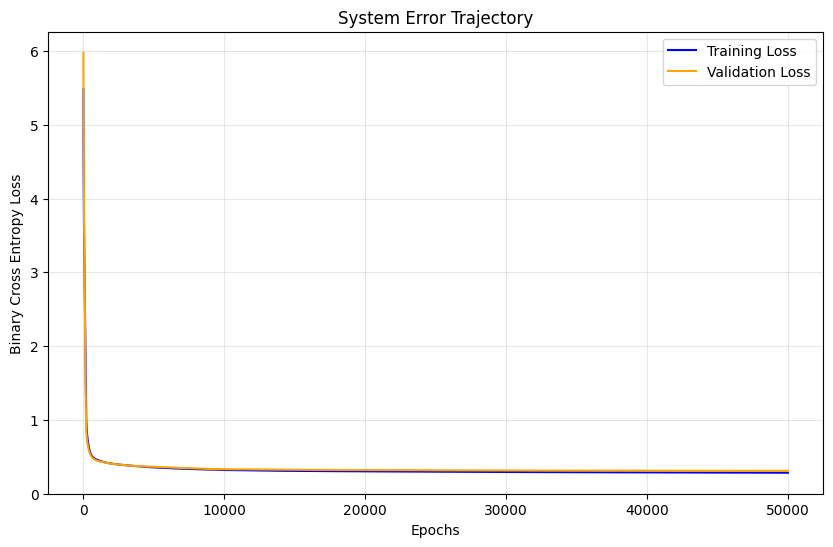

Error is descreasing with epochs. System is actually learning and not just diverging


2. Integrity Check: Accuracy Plot


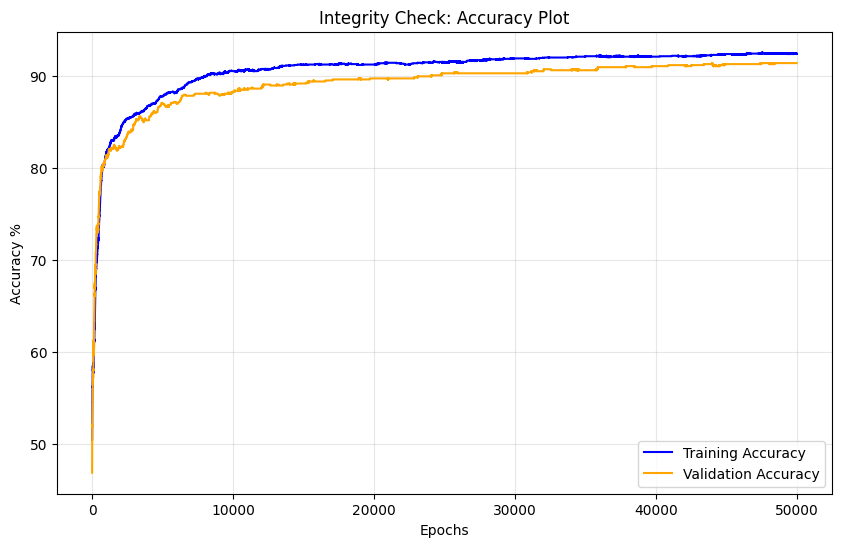

Final Validation Accuracy is :  91.44%, Final Training accuracy is :  92.48%
No Overfitting


3. Geospatial threat map: Decision Boundary


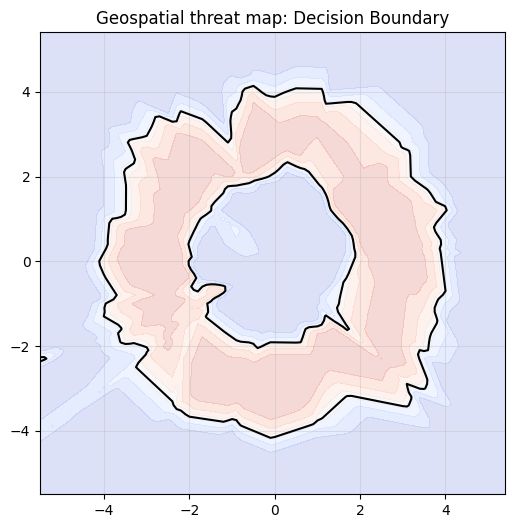

Donut shaped boundary obtained


In [3]:
# ==============================================================================
# Code from here. Best of luckk :)
# Import libraries
import torch, matplotlib.pyplot as plt, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split

# Initialize variables
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

# Define Binary Cross Entropy Loss
def loss_fn(y_pred, y_true):
    y_pred = torch.clamp(y_pred, min=1e-7, max=1-1e-7)
    N = y_true.shape[0]
    return -torch.sum(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)) / N

# Split data into training (70%) and testing (30%) sets
# random_state=13 ensures the split is the same every time we run the code
x_train, x_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=GROUP_NUMBER)

# ==============================
# Neural Network Initialization
# ==============================

# Architecture:
# Input Layer: 2 neurons (2D input coordinates)
# Hidden Layer 1: 16 neurons
# Hidden Layer 2: 16 neurons
# Hidden Layer 3: 16 neurons
# Output Layer: 1 neuron (binary classification)

torch.manual_seed(GROUP_NUMBER) # Set seed for reproducible random weights

# Initialize Weights and Biases manually
# requires_grad=True tells PyTorch to track operations on these tensors for backpropagation

# Layer 1 weights: Connects 2 inputs to 16 hidden neurons
w1 = torch.randn(2, 16, requires_grad=True)
b1 = torch.randn(16, requires_grad=True)

# Layer 2 weights: Connects 16 hidden neurons to 16 hidden neurons
w2 = torch.randn(16, 16, requires_grad=True)
b2 = torch.randn(16, requires_grad=True)

# Layer 3 weights: Connects 16 hidden neurons to 16 hidden neurons
w3 = torch.randn(16, 16, requires_grad=True)
b3 = torch.randn(16, requires_grad=True)

# Layer 4 weights: Connects 16 hidden neurons to 1 output neuron
w4 = torch.randn(16, 1, requires_grad=True)
b4 = torch.randn(1, requires_grad=True)

# ==============================
# Training Loop
# ==============================

learning_rate = 0.001

for epoch in range(50000):

    # --- Forward Pass ---
    # Layer 1: Matrix multiplication (Input * W1) + Bias
    z1 = torch.matmul(x_train, w1) + b1
    a1 = torch.relu(z1) # Activation: ReLU (turns negative values to 0)

    # Layer 2: Matrix multiplication (Layer1_Output * W2) + Bias
    z2 = torch.matmul(a1, w2) + b2
    a2 = torch.relu(z2) # Activation: ReLU

    # Layer 3: Matrix multiplication (Layer2_Output * W3) + Bias
    z3 = torch.matmul(a2, w3) + b3
    a3 = torch.relu(z3) # Activation: ReLU

    # Layer 4: Matrix multiplication (Layer3_Output * W4) + Bias
    z4 = torch.matmul(a3, w4) + b4

    # Apply Sigmoid to output layer to get probabilities summing to 1
    a4 = torch.sigmoid(z4)

    # --- Training Loss & Accuracy Calculation ---
    output_loss = loss_fn(a4, y_train)
    with torch.no_grad():
        training_loss.append(output_loss.item())

        training_predictions = (a4 > 0.5).int()
        output_accuracy = (training_predictions == y_train).sum().item() / y_train.size(0) * 100
        training_accuracy.append(output_accuracy)

    # --- Validation Loss & Accuracy Calculation ---
    with torch.no_grad(): # Disable gradient tracking for validation
        val_z1 = torch.matmul(x_test, w1) + b1
        val_a1 = torch.relu(val_z1)
        val_z2 = torch.matmul(val_a1, w2) + b2
        val_a2 = torch.relu(val_z2)
        val_z3 = torch.matmul(val_a2, w3) + b3
        val_a3 = torch.relu(val_z3)
        val_z4 = torch.matmul(val_a3, w4) + b4
        val_a4 = torch.sigmoid(val_z4)

        val_loss = loss_fn(val_a4, y_test)
        validation_loss.append(val_loss.item())

        val_predictions = (val_a4 > 0.5).int()
        val_accuracy = (val_predictions == y_test).sum().item() / y_test.size(0) * 100
        validation_accuracy.append(val_accuracy)

    # --- Backward Pass ---
    # Calculates gradients (dLoss/dw) for all tensors with requires_grad=True
    output_loss.backward()

    # --- Optimizer Step (Manual Gradient Descent) ---
    # We use 'with torch.no_grad()' because we don't want these update operations
    # to be added to the computation graph (we only track gradients during Forward Pass)
    with torch.no_grad():
        # Update weights: w_new = w_old - (learning_rate * gradient)
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad
        w3 -= learning_rate * w3.grad
        b3 -= learning_rate * b3.grad
        w4 -= learning_rate * w4.grad
        b4 -= learning_rate * b4.grad

        # Reset gradients to zero after updating.
        # Otherwise, PyTorch accumulates (adds) gradients in the next loop.
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()
        w3.grad.zero_()
        b3.grad.zero_()
        w4.grad.zero_()
        b4.grad.zero_()

# ==============================
# Applying fully trained model on training data one more tiem
# ==============================
with torch.no_grad(): # Disable gradient tracking for validation
    z1 = torch.matmul(x_train, w1) + b1
    a1 = torch.relu(z1)
    z2 = torch.matmul(a1, w2) + b2
    a2 = torch.relu(z2)
    z3 = torch.matmul(a2, w3) + b3
    a3 = torch.relu(z3)
    z4 = torch.matmul(a3, w4) + b4
    a4 = torch.sigmoid(z4)

    final_train_loss = loss_fn(a4, y_train)

    train_predictions = (a4 > 0.5).int()
    final_train_accuracy = (train_predictions == y_train).sum().item() / y_train.size(0) * 100

# ==============================
# Testing / Validation using fully trained model
# ==============================

# Perform a forward pass on the test data
z1 = torch.matmul(x_test, w1) + b1
a1 = torch.relu(z1)

z2 = torch.matmul(a1, w2) + b2
a2 = torch.relu(z2)

z3 = torch.matmul(a2, w3) + b3
a3 = torch.relu(z3)

z4 = torch.matmul(a3, w4) + b4
a4 = torch.sigmoid(z4) # Get final probabilities

# Get predictions:
# a4 is 0 when z4 is -inf, 0.5 when z4 is 0, 1 when z4 is +inf
# prediction is either 0(class 0) or 1(class 1)
predictions = (a4 > 0.5).int()

# Calculate Accuracy:
# (predictions == y_test) creates a boolean tensor [True, False, True...]
# .sum() counts the Trues. .item() gets the number as a python float.
final_val_accuracy = (predictions == y_test).sum().item() / y_test.size(0) * 100

# Calculate final loss on test set for reference
final_val_loss = loss_fn(a4, y_test)



# ==============================
# The GDC Dashboard: Required Output
# ==============================

# 1. System Error Trajectory: Loss Plot
print("1. System Error Trajectory: Loss Plot")

plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Validation Loss', color='orange')

plt.title('System Error Trajectory')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()
print("Error is descreasing with epochs. System is actually learning and not just diverging")
print("\n")

# 2. Integrity Check: Accuracy Plot
print("2. Integrity Check: Accuracy Plot")

plt.figure(figsize=(10, 6))
plt.plot(training_accuracy, label='Training Accuracy', color='blue')
plt.plot(validation_accuracy, label='Validation Accuracy', color='orange')

plt.title('Integrity Check: Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()
print(f"Final Validation Accuracy is : {final_val_accuracy: .2f}%, Final Training accuracy is : {final_train_accuracy: .2f}%")
print("No Overfitting")
print("\n")

# 3. Geospatial threat map: Decision Boundary
print("3. Geospatial threat map: Decision Boundary")

plt.figure(figsize=(6, 6))

# Create a meshgrid (a background grid of points): plt.contour needs a mesh
# We go slightly beyond the min/max of our data to frame it in the center nicely
x_min, x_max = x_test[:, 0].min().item() - 0.5, x_test[:, 0].max().item() + 0.5
y_min, y_max = x_test[:, 1].min().item() - 0.5, x_test[:, 1].max().item() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Flatten the grid to pass it through the neural network
# We need it in the shape [N_points, 2] just like x_test
grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Forward Pass on the grid (using our trained weights)
with torch.no_grad():
    z1 = torch.matmul(grid_tensor, w1) + b1
    a1 = torch.relu(z1)
    z2 = torch.matmul(a1, w2) + b2
    a2 = torch.relu(z2)
    z3 = torch.matmul(a2, w3) + b3
    a3 = torch.relu(z3)
    z4 = torch.matmul(a3, w4) + b4
    prob_grid = torch.sigmoid(z4).reshape(xx.shape) # Reshape back to grid for plotting

# Plot the Contour (The Decision Boundary)
# levels=[0.5] draws a single line where probability is exactly 0.5
plt.contourf(xx, yy, prob_grid, alpha=0.2, cmap='coolwarm') # Background colors
plt.contour(xx, yy, prob_grid, levels=[0.5], colors='black') # The boundary line

plt.title('Geospatial threat map: Decision Boundary')
plt.grid(True, alpha=0.3)
plt.show()

print("Donut shaped boundary obtained")
# ==============================================================================